In [ ]:
import itertools
import os
from smoothing import IdentitySmoothing, PolynomialSmoothing, SoftmaxSmoothing

visible_15 = [True] * 15
visible_10 = [True] * 10
visible_3 = [True] * 3
not_visible_15 = [False] * 15
not_visible_10 = [False] * 10
not_visible_3 = [False] * 3

visibles = (
    visible_10
    + visible_15
    + not_visible_3
    + not_visible_15
    + not_visible_10
    + not_visible_15
    + not_visible_3
    + not_visible_15
    + visible_10
)
starts = []
ends = []
for i in range(len(visibles)):
    if visibles[i] == True:
        if i == 0 or visibles[i - 1] == False:
            starts.append(i)
        if i == len(visibles) - 1 or visibles[i + 1] == False:
            ends.append(i)


def error_test(true, belief):
    loss = 0
    for i in range(len(belief)):
        diff = abs(i - true)
        loss += belief[i] * min(diff, len(belief) - diff)
    return loss


def vertical_line(x, ax):
    ax.axvline(x=x, color="k", linestyle="--")





"""
polynomial smoothing k=1 does horrible, k=1.5 does better and k=2 does awesome.
Softmax does great as long as it itsn't 0.1 (0.03 and 0.01 do equally good)

non relu changes literally nothing
 
Poly smoothing does amazing with multiplicaitive, better then with additive
Mult vs Add doesn't affect softmax
Storing strength doesn't do much
"""

"\npolynomial smoothing k=1 does horrible, k=1.5 does better and k=2 does awesome.\nSoftmax does great as long as it itsn't 0.1 (0.03 and 0.01 do equally good)\n\nnon relu changes literally nothing\n \nPoly smoothing does amazing with multiplicaitive, better then with additive\nMult vs Add doesn't affect softmax\nStoring strength doesn't do much\n\n"

Compare different smoothing methods: Store always, hard, with multiplicative shifts

70
75
80
85
90
95
100


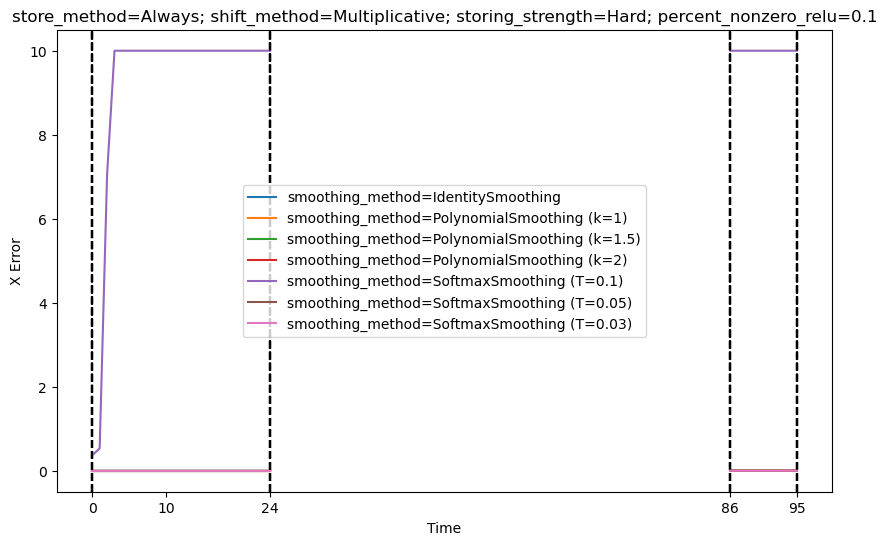

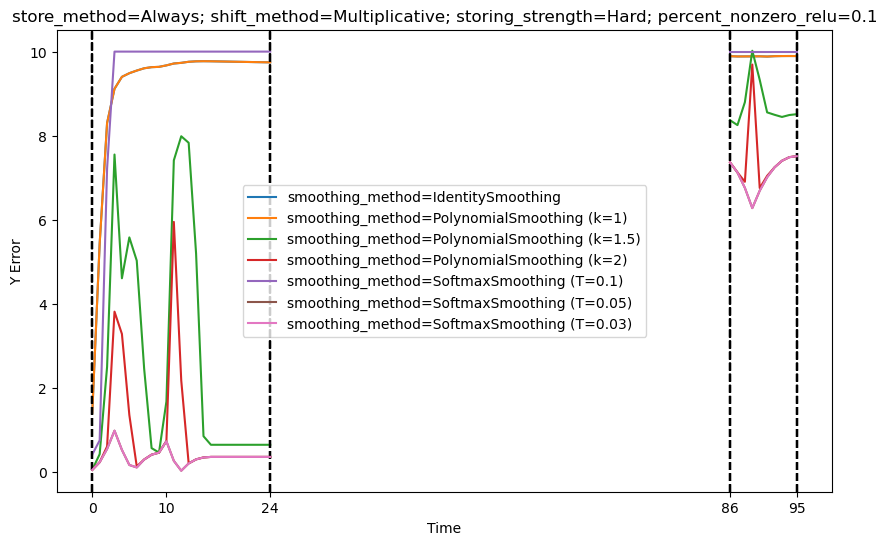

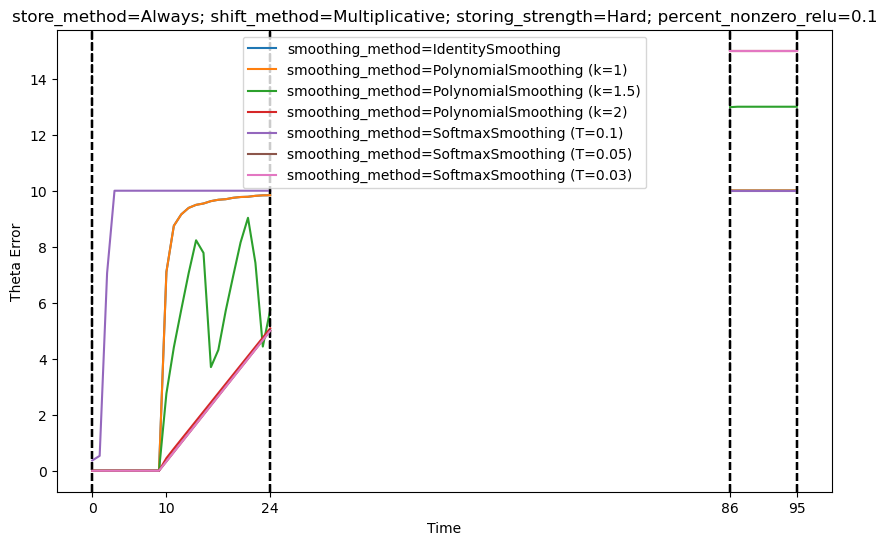

In [37]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import copy

store_methods = ["Always", "When New"]
shift_methods = ["Additive", "Multiplicative"]
storing_strength = ["Hard", "Soft"]
smoothing_methods = [
    IdentitySmoothing(),
    PolynomialSmoothing(k=1),
    PolynomialSmoothing(k=1.5),
    PolynomialSmoothing(k=2),
    SoftmaxSmoothing(T=0.1),
    SoftmaxSmoothing(T=0.05),
    SoftmaxSmoothing(T=0.03),
]
non_zero_relus = [0.1, 0.2, 0.5, 0.8, 0.9]
test_methods = itertools.product(
    store_methods, shift_methods, storing_strength, smoothing_methods, non_zero_relus
)

figs, ax = [], []
for i in range(3):
    fig, a = plt.subplots(figsize=(10, 6))
    figs.append(fig)
    ax.append(a)

for o, [
    store_method,
    shift_method,
    storing_strength,
    smoothing_method,
    non_zero_relu,
] in enumerate(copy.deepcopy(test_methods)):
    # print(store_method, shift_method, storing_strength, smoothing_method, non_zero_relu)
    if store_method != "Always":
        continue
    if shift_method != "Multiplicative":
        continue
    if storing_strength != "Hard":
        continue
    if non_zero_relu != 0.1:
        continue

    print(o)
    with open(f"hypers_searching/kidnapped_history_{o}.pkl", "rb") as f:
        history = pickle.load(f)

    true_pos = history._true_positions
    theta_pos = history._true_angles
    b_x_pos_dists = history._x_distributions
    b_y_pos_dists = history._y_distributions
    b_theta_pos_dists = history._theta_distributions

    first = True
    x_color = None
    y_color = None
    theta_color = None
    params_label = f"smoothing_method={smoothing_method}"

    for start, end in zip(starts, ends):
        xs = np.arange(start, end + 1)

        x_errors = []
        y_errors = []
        theta_errors = []

        for j in range(start, end + 1):
            x_errors.append(error_test(true_pos[j][0], b_x_pos_dists[j]))
            y_errors.append(error_test(true_pos[j][1], b_y_pos_dists[j]))
            theta_errors.append(error_test(theta_pos[j], b_theta_pos_dists[j]))

        vertical_line(start, ax[0])
        vertical_line(start, ax[1])
        vertical_line(start, ax[2])
        vertical_line(end, ax[0])
        vertical_line(end, ax[1])
        vertical_line(end, ax[2])

        label = params_label if first else None
        l0 = ax[0].plot(xs, x_errors, color=x_color, label=label)
        l1 = ax[1].plot(xs, y_errors, color=y_color, label=label)
        l2 = ax[2].plot(xs, theta_errors, color=theta_color, label=label)

        if first:
            x_color = l0[0].get_color()
            y_color = l1[0].get_color()
            theta_color = l2[0].get_color()
            first = False

ax[0].set_xlabel("Time")
ax[1].set_xlabel("Time")
ax[2].set_xlabel("Time")

ax[0].set_ylabel("X Error")
ax[1].set_ylabel("Y Error")
ax[2].set_ylabel("Theta Error")

ax[0].set_title("store_method=Always; shift_method=Multiplicative; storing_strength=Hard; percent_nonzero_relu=0.1")
ax[1].set_title("store_method=Always; shift_method=Multiplicative; storing_strength=Hard; percent_nonzero_relu=0.1")
ax[2].set_title("store_method=Always; shift_method=Multiplicative; storing_strength=Hard; percent_nonzero_relu=0.1")

ax[0].set_xticks([0, 10, 24, 86, 95])
ax[1].set_xticks([0, 10, 24, 86, 95])
ax[2].set_xticks([0, 10, 24, 86, 95])

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

Poly smoothing does amazing with multiplicaitive, better then with additive

5
10
15
75
80
85


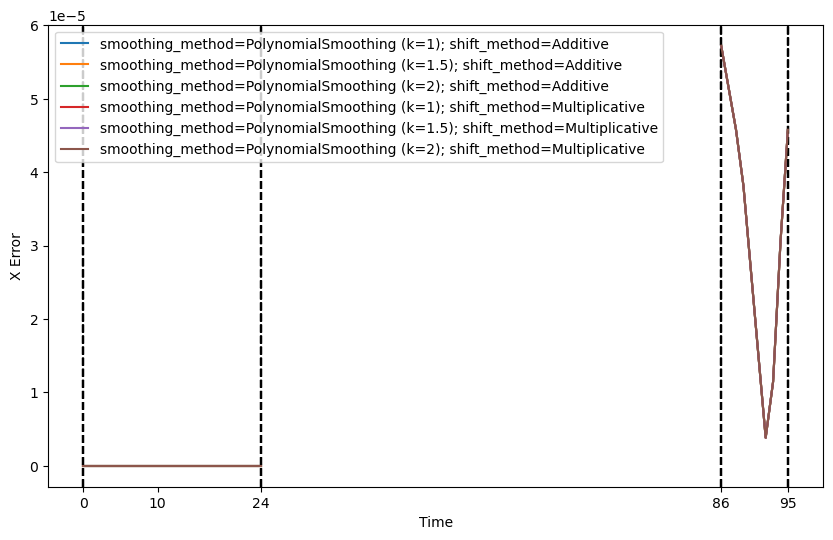

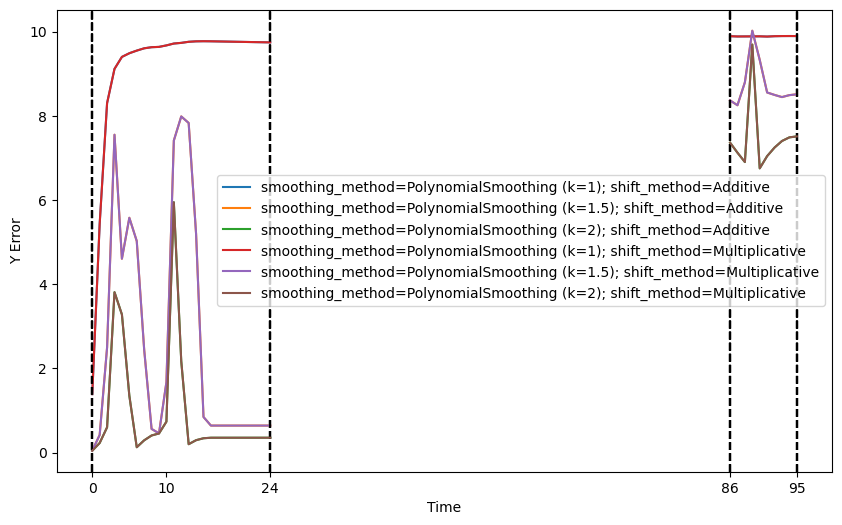

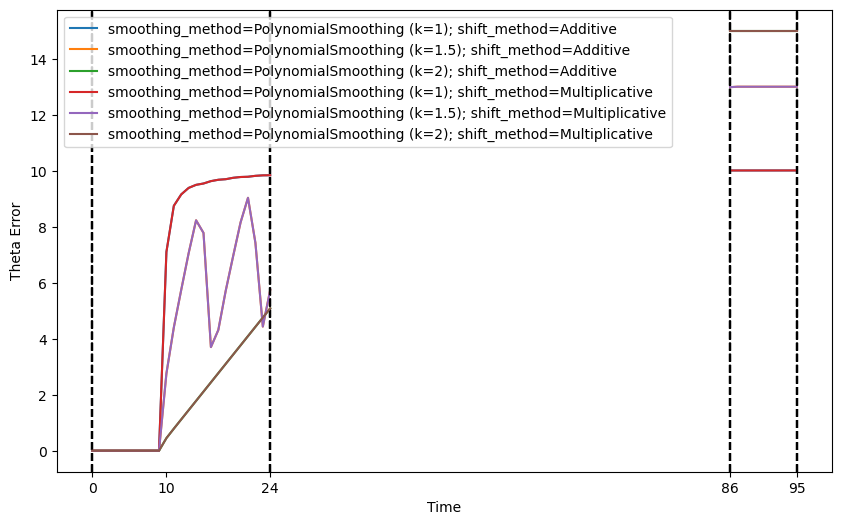

In [36]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import copy

store_methods = ["Always", "When New"]
shift_methods = ["Additive", "Multiplicative"]
storing_strength = ["Hard", "Soft"]
smoothing_methods = [
    IdentitySmoothing(),
    PolynomialSmoothing(k=1),
    PolynomialSmoothing(k=1.5),
    PolynomialSmoothing(k=2),
    SoftmaxSmoothing(T=0.1),
    SoftmaxSmoothing(T=0.05),
    SoftmaxSmoothing(T=0.03),
]
non_zero_relus = [0.1, 0.2, 0.5, 0.8, 0.9]
test_methods = itertools.product(
    store_methods, shift_methods, storing_strength, smoothing_methods, non_zero_relus
)

figs, ax = [], []
for i in range(3):
    fig, a = plt.subplots(figsize=(10, 6))
    figs.append(fig)
    ax.append(a)

for o, [
    store_method,
    shift_method,
    storing_strength,
    smoothing_method,
    non_zero_relu,
] in enumerate(copy.deepcopy(test_methods)):
    # print(store_method, shift_method, storing_strength, smoothing_method, non_zero_relu)
    if not isinstance(smoothing_method, PolynomialSmoothing):
        continue
    if non_zero_relu != 0.1:
        continue
    if store_method != "Always":
        continue
    if storing_strength != "Hard":
        continue

    print(o)
    with open(f"hypers_searching/kidnapped_history_{o}.pkl", "rb") as f:
        history = pickle.load(f)

    true_pos = history._true_positions
    theta_pos = history._true_angles
    b_x_pos_dists = history._x_distributions
    b_y_pos_dists = history._y_distributions
    b_theta_pos_dists = history._theta_distributions

    first = True
    x_color = None
    y_color = None
    theta_color = None
    params_label = f"smoothing_method={smoothing_method}; shift_method={shift_method}"

    for start, end in zip(starts, ends):
        xs = np.arange(start, end + 1)

        x_errors = []
        y_errors = []
        theta_errors = []

        for j in range(start, end + 1):
            x_errors.append(error_test(true_pos[j][0], b_x_pos_dists[j]))
            y_errors.append(error_test(true_pos[j][1], b_y_pos_dists[j]))
            theta_errors.append(error_test(theta_pos[j], b_theta_pos_dists[j]))

        vertical_line(start, ax[0])
        vertical_line(start, ax[1])
        vertical_line(start, ax[2])
        vertical_line(end, ax[0])
        vertical_line(end, ax[1])
        vertical_line(end, ax[2])

        label = params_label if first else None
        l0 = ax[0].plot(xs, x_errors, color=x_color, label=label)
        l1 = ax[1].plot(xs, y_errors, color=y_color, label=label)
        l2 = ax[2].plot(xs, theta_errors, color=theta_color, label=label)

        if first:
            x_color = l0[0].get_color()
            y_color = l1[0].get_color()
            theta_color = l2[0].get_color()
            first = False

ax[0].set_xlabel("Time")
ax[1].set_xlabel("Time")
ax[2].set_xlabel("Time")

ax[0].set_ylabel("X Error")
ax[1].set_ylabel("Y Error")
ax[2].set_ylabel("Theta Error")


ax[0].set_xticks([0, 10, 24, 86, 95])
ax[1].set_xticks([0, 10, 24, 86, 95])
ax[2].set_xticks([0, 10, 24, 86, 95])

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

Mult vs Add doesn't affect softmax

20
25
30
90
95
100


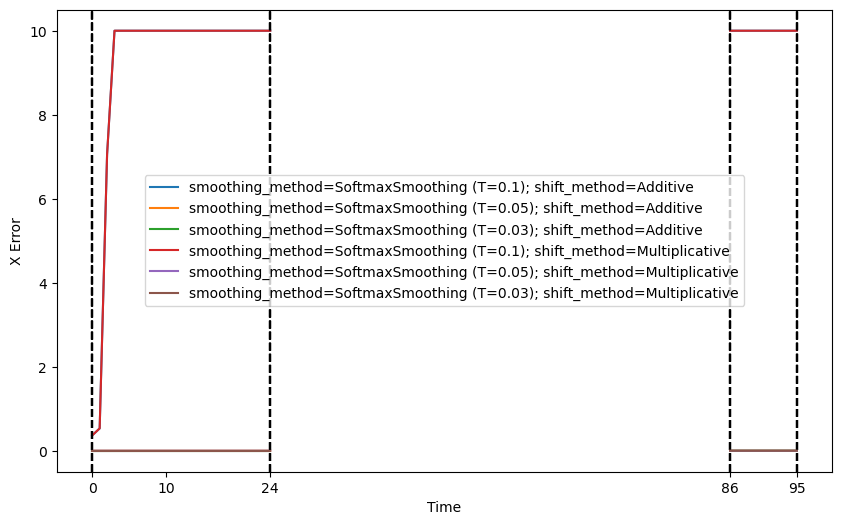

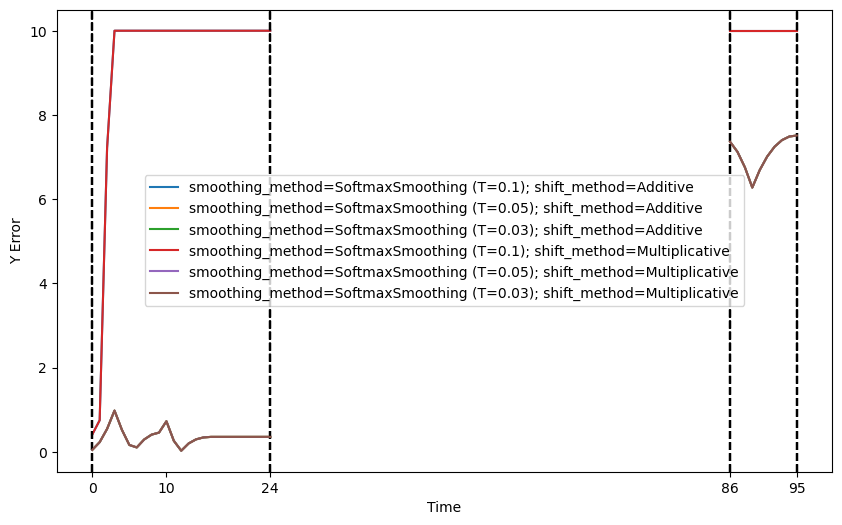

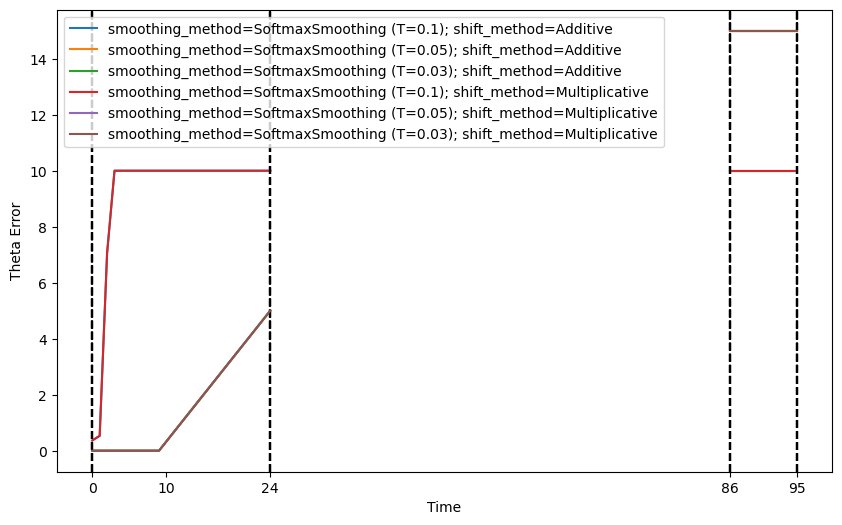

In [38]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import copy

store_methods = ["Always", "When New"]
shift_methods = ["Additive", "Multiplicative"]
storing_strength = ["Hard", "Soft"]
smoothing_methods = [
    IdentitySmoothing(),
    PolynomialSmoothing(k=1),
    PolynomialSmoothing(k=1.5),
    PolynomialSmoothing(k=2),
    SoftmaxSmoothing(T=0.1),
    SoftmaxSmoothing(T=0.05),
    SoftmaxSmoothing(T=0.03),
]
non_zero_relus = [0.1, 0.2, 0.5, 0.8, 0.9]
test_methods = itertools.product(
    store_methods, shift_methods, storing_strength, smoothing_methods, non_zero_relus
)

figs, ax = [], []
for i in range(3):
    fig, a = plt.subplots(figsize=(10, 6))
    figs.append(fig)
    ax.append(a)

for o, [
    store_method,
    shift_method,
    storing_strength,
    smoothing_method,
    non_zero_relu,
] in enumerate(copy.deepcopy(test_methods)):
    # print(store_method, shift_method, storing_strength, smoothing_method, non_zero_relu)
    if not isinstance(smoothing_method, SoftmaxSmoothing):
        continue
    if non_zero_relu != 0.1:
        continue
    if store_method != "Always":
        continue
    if storing_strength != "Hard":
        continue

    print(o)
    with open(f"hypers_searching/kidnapped_history_{o}.pkl", "rb") as f:
        history = pickle.load(f)

    true_pos = history._true_positions
    theta_pos = history._true_angles
    b_x_pos_dists = history._x_distributions
    b_y_pos_dists = history._y_distributions
    b_theta_pos_dists = history._theta_distributions

    first = True
    x_color = None
    y_color = None
    theta_color = None
    params_label = f"smoothing_method={smoothing_method}; shift_method={shift_method}"

    for start, end in zip(starts, ends):
        xs = np.arange(start, end + 1)

        x_errors = []
        y_errors = []
        theta_errors = []

        for j in range(start, end + 1):
            x_errors.append(error_test(true_pos[j][0], b_x_pos_dists[j]))
            y_errors.append(error_test(true_pos[j][1], b_y_pos_dists[j]))
            theta_errors.append(error_test(theta_pos[j], b_theta_pos_dists[j]))

        vertical_line(start, ax[0])
        vertical_line(start, ax[1])
        vertical_line(start, ax[2])
        vertical_line(end, ax[0])
        vertical_line(end, ax[1])
        vertical_line(end, ax[2])

        label = params_label if first else None
        l0 = ax[0].plot(xs, x_errors, color=x_color, label=label)
        l1 = ax[1].plot(xs, y_errors, color=y_color, label=label)
        l2 = ax[2].plot(xs, theta_errors, color=theta_color, label=label)

        if first:
            x_color = l0[0].get_color()
            y_color = l1[0].get_color()
            theta_color = l2[0].get_color()
            first = False

ax[0].set_xlabel("Time")
ax[1].set_xlabel("Time")
ax[2].set_xlabel("Time")

ax[0].set_ylabel("X Error")
ax[1].set_ylabel("Y Error")
ax[2].set_ylabel("Theta Error")


ax[0].set_xticks([0, 10, 24, 86, 95])
ax[1].set_xticks([0, 10, 24, 86, 95])
ax[2].set_xticks([0, 10, 24, 86, 95])

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()